Predicting Employee Attrition    

In recent years, attention has increasingly been paid to human resources (HR), since worker quality and skills represent a growth factor and a real competitive advantage for companies. After proving its mettle in sales and marketing, artificial intelligence is also becoming central to employee-related decisions within HR management. Organizational growth largely depends on staff retention. Losing employees frequently impacts the morale of the organization and hiring new employees is more expensive than retaining existing ones. 

You are working as a data scientist with HR Department of a large insurance company focused on sales team attrition. Insurance sales teams help insurance companies generate new business by contacting potential customers and selling one or more types of insurance. The department generally sees high attrition and thus staffing becomes a crucial aspect. 

To aid staffing, you are provided with the monthly information for a segment of employees for 2016 and 2017 and tasked to predict whether a current employee will be leaving the organization in the upcoming two quarters (01 Jan 2018 - 01 July 2018) or not, given:


1. Demographics of the employee (city, age, gender etc.)
2. Tenure information (joining date, Last Date)
3. Historical data regarding the performance of the employee (Quarterly rating, Monthly business acquired, designation, salary)

In [16]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, recall_score, precision_score, accuracy_score, auc,f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [17]:
# reading training data
train_df = pd.read_csv('train_MpHjUjU.csv')

In [18]:
# reading testing data
test_df = pd.read_csv('test_hXY9mYw.csv')

In [19]:
train_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [20]:
test_df.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [21]:
train_df.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [22]:
train_df.shape

(19104, 13)

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


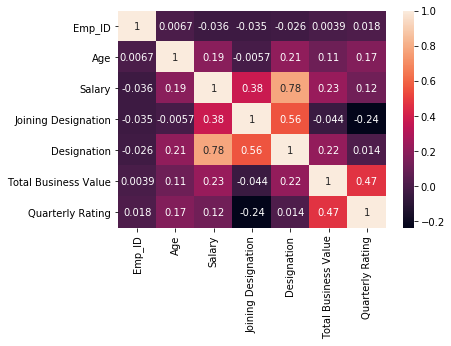

In [24]:
# checking correlation
sns.heatmap(train_df.corr(), annot=True)

In [25]:
train_df.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [27]:
# finding employee who leave the company using 'LastWorkingDate' column

In [28]:
left_employee = train_df[['Emp_ID', 'LastWorkingDate']].dropna()

In [29]:
left_employee

,Emp_ID,LastWorkingDate
2,1,2016-03-11
9,4,2017-04-27
12,5,2016-03-07
20,8,2017-11-15
27,12,2016-12-21
...,...,...
19039,2779,2017-02-14
19054,2782,2016-08-16
19081,2785,2017-10-28
19090,2786,2016-09-22


In [30]:
left_emp_id_list = left_employee['Emp_ID'].tolist()

In [31]:
left_emp_id_list

[1,
 4,
 5,
 8,
 12,
 13,
 16,
 17,
 18,
 20,
 21,
 22,
 24,
 29,
 30,
 34,
 35,
 36,
 37,
 38,
 40,
 42,
 43,
 44,
 46,
 49,
 50,
 51,
 55,
 57,
 58,
 59,
 61,
 64,
 65,
 69,
 70,
 71,
 74,
 75,
 79,
 81,
 82,
 83,
 84,
 86,
 88,
 89,
 90,
 91,
 93,
 95,
 96,
 98,
 99,
 101,
 102,
 103,
 105,
 106,
 107,
 108,
 110,
 111,
 113,
 116,
 118,
 119,
 120,
 121,
 123,
 125,
 127,
 130,
 131,
 132,
 133,
 136,
 138,
 139,
 141,
 142,
 143,
 144,
 145,
 147,
 149,
 151,
 152,
 153,
 154,
 155,
 156,
 158,
 159,
 161,
 162,
 163,
 164,
 165,
 167,
 169,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 183,
 184,
 185,
 187,
 190,
 193,
 194,
 195,
 196,
 197,
 200,
 201,
 203,
 204,
 207,
 208,
 211,
 215,
 216,
 217,
 219,
 220,
 221,
 222,
 223,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 235,
 238,
 241,
 242,
 244,
 245,
 246,
 247,
 256,
 257,
 260,
 261,
 262,
 264,
 266,
 267,
 268,
 270,
 278,
 279,
 280,
 282,
 284,
 286,
 287,
 290,
 291,
 292,
 293,
 295,
 298,
 29

In [32]:
# create target column

In [34]:
# employee left the company-> 1, otherwise 0
train_df['Target'] = train_df['Emp_ID'].apply(lambda x: 1 if x in left_emp_id_list else 0)

In [35]:
train_df['Target'].value_counts()

1    10359
0     8745
Name: Target, dtype: int64

In [36]:
train_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,1
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,1
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0


In [39]:
# extracting test data with recent day entry

In [40]:
sorted_train_df = train_df.sort_values(by=['Emp_ID','Age','LastWorkingDate'])

In [41]:
sorted_train_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,1
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0


In [43]:
test_data = test_df.merge(sorted_train_df,how='left',on='Emp_ID')

In [44]:
test_data.head()

,Emp_ID,MMM-YY,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,394,2016-01-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,189360,1,0
1,394,2016-02-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,390810,1,0
2,394,2016-03-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,1846360,1,0
3,394,2016-04-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,194010,2,0
4,394,2016-05-01,33,Female,C20,Master,97722,2011-06-06,NaN,2,4,371160,2,0


In [45]:
test_data = test_data.drop_duplicates('Emp_ID').reset_index()

In [46]:
test_data.head()

,index,Emp_ID,MMM-YY,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,0,394,2016-01-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,189360,1,0
1,24,173,2016-01-01,37,Male,C28,College,56174,2011-06-13,NaN,1,3,1295750,2,0
2,48,1090,2016-01-01,37,Male,C13,College,96750,2011-06-27,NaN,2,4,1382660,3,0
3,72,840,2016-01-01,39,Female,C8,College,88813,2011-07-11,NaN,1,4,391050,1,0
4,96,308,2016-01-01,30,Male,C5,Master,188418,2011-08-15,NaN,2,5,1507300,3,0


In [47]:
test_data = test_data.drop(['index','Target'],axis=1)

In [48]:
test_data.to_csv('unique_emp_id_data.csv')

In [49]:
train_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,1
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,1
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0


In [50]:
training_data = train_df.drop(['MMM-YY','Emp_ID','Dateofjoining','LastWorkingDate'],axis=1)

In [51]:
# one hot encoding using pandas
training_data = pd.get_dummies(training_data,drop_first=True)

In [52]:
training_data.head()

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target,Gender_Male,City_C10,City_C11,...,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_College,Education_Level_Master
0,28,57387,1,1,2381060,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,28,57387,1,1,-665480,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,57387,1,1,0,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,31,67016,2,2,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,31,67016,2,2,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [53]:
X = training_data.drop('Target', axis=1)
y = training_data['Target']

In [54]:
X.head()

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Gender_Male,City_C10,City_C11,City_C12,...,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_College,Education_Level_Master
0,28,57387,1,1,2381060,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,28,57387,1,1,-665480,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,28,57387,1,1,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,31,67016,2,2,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,31,67016,2,2,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [55]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Target, dtype: int64

In [56]:
# splitting data
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.25,random_state=11)

In [57]:
# standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# model building
decision_tree_model = DecisionTreeClassifier()
randomf_model = RandomForestClassifier()
log_model = LogisticRegression()
svm_model = SVC()

In [59]:
decision_tree_model = decision_tree_model.fit(X_train,y_train)
randomf_model = randomf_model.fit(X_train,y_train)
log_model = log_model.fit(X_train,y_train)
svm_model = svm_model.fit(X_train,y_train)

In [60]:
# training accuracy
print('Decision Tree Model training Accuracy:', decision_tree_model.score(X_train, y_train))
print('Random Forest Model training Accuracy:', randomf_model.score(X_train, y_train))
print('Logistic Regression Model training Accuracy:', log_model.score(X_train, y_train))
print('Support Vector Model training Accuracy:', svm_model.score(X_train, y_train))

Decision Tree Model training Accuracy: 1.0
Random Forest Model training Accuracy: 1.0
Logistic Regression Model training Accuracy: 0.7104969290898939
Support Vector Model training Accuracy: 0.8316582914572864


In [61]:
y_pred_dt = decision_tree_model.predict(X_test)
y_pred_rf = randomf_model.predict(X_test)
y_pred_log = log_model.predict(X_test)
y_pred_svm  = svm_model.predict(X_test)

In [62]:
# testing accuracy
print('Decision Tree Model Accuracy:', accuracy_score(y_test,y_pred_dt))
print('Random Forest Model Accuracy:', accuracy_score(y_test,y_pred_rf))
print('Logistic Regression Model Accuracy:', accuracy_score(y_test,y_pred_log))
print('Support Vector Model Accuracy:', accuracy_score(y_test,y_pred_svm))

Decision Tree Model Accuracy: 0.9585427135678392
Random Forest Model Accuracy: 0.9646147403685092
Logistic Regression Model Accuracy: 0.7171273031825796
Support Vector Model Accuracy: 0.8195142378559463


In [64]:
print('Decision Tree Model F1 score:', f1_score(y_test,y_pred_dt,average='macro'))
print('Random Forest Model F1 score:', f1_score(y_test,y_pred_rf,average='macro'))
print('Logistic Regression Model F1 score:', f1_score(y_test,y_pred_log,average='macro'))
print('Support Vector Model F1 score:', f1_score(y_test,y_pred_svm,average='macro'))

Decision Tree Model F1 score: 0.9581646836895672
Random Forest Model F1 score: 0.9642551936418366
Logistic Regression Model F1 score: 0.7122307343303669
Support Vector Model F1 score: 0.8161718635579387


In [ ]:
import time
start = time.time()
param_dict = {
                'C' : [1,2],
                'kernel' : ['rbf','poly','linear','sigmoid'],
                'gamma' : ['scale','auto']
               }
cv_model = GridSearchCV(svm_model, param_grid = param_dict, cv=10)

cv_rf.fit(X_train,y_train)

print('Best Parameter using Grid Search: \n',cv_model.best_params_)
end = time.time()
print('Time taken in grid search:{} sec'.format(end-start))

In [247]:
confusion_matrix(y_test, y_pred_svm)

array([[1600,  565],
       [ 288, 2323]], dtype=int64)

In [65]:
testing_data = pd.read_csv('unique_emp_id_data.csv')

In [66]:
testing_data.head()

,Unnamed: 0,Emp_ID,MMM-YY,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,0,394,2016-01-01,32,Female,C20,Master,97722,2011-06-06,NaN,2,4,189360,1
1,1,173,2016-01-01,37,Male,C28,College,56174,2011-06-13,NaN,1,3,1295750,2
2,2,1090,2016-01-01,37,Male,C13,College,96750,2011-06-27,NaN,2,4,1382660,3
3,3,840,2016-01-01,39,Female,C8,College,88813,2011-07-11,NaN,1,4,391050,1
4,4,308,2016-01-01,30,Male,C5,Master,188418,2011-08-15,NaN,2,5,1507300,3


In [67]:
testing_data = testing_data.drop(['Emp_ID','Unnamed: 0','MMM-YY','Dateofjoining','LastWorkingDate'],axis=1)

In [68]:
testing_data = pd.get_dummies(testing_data, drop_first=True)

In [69]:
testing_data

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Gender_Male,City_C10,City_C11,City_C12,...,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_College,Education_Level_Master
0,32,97722,2,4,189360,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,37,56174,1,3,1295750,2,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,37,96750,2,4,1382660,3,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,39,88813,1,4,391050,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,30,188418,2,5,1507300,3,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,38,116006,2,5,3198430,4,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
737,38,133489,3,4,1005280,2,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
738,35,65389,2,4,3011170,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
739,46,105513,2,4,1051620,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [71]:
# standardize data with same mean and std
testing_data = scaler.transform(testing_data)

In [72]:
dt_pred_test_data = decision_tree_model.predict(testing_data)
rf_pred_test_data = randomf_model.predict(testing_data)
log_pred_test_data = log_model.predict(testing_data)
svm_pred_test_data = svm_model.predict(testing_data)

In [73]:
dt_pred = pd.DataFrame({'Emp_ID':test_data['Emp_ID'].tolist(),"Target":dt_pred_test_data})
rf_pred = pd.DataFrame({'Emp_ID':test_data['Emp_ID'].tolist(),"Target":rf_pred_test_data})
log_pred = pd.DataFrame({'Emp_ID':test_data['Emp_ID'].tolist(),"Target":log_pred_test_data})
svm_pred = pd.DataFrame({'Emp_ID':test_data['Emp_ID'].tolist(),"Target":svm_pred_test_data})

In [74]:
dt_pred

,Emp_ID,Target
0,394,1
1,173,1
2,1090,1
3,840,1
4,308,0
...,...,...
736,2134,0
737,2255,1
738,448,0
739,1644,1


In [75]:
dt_pred.to_csv('dt_pred.csv')
rf_pred.to_csv('rf_pred.csv')
svm_pred.to_csv('svm_pred.csv')
log_pred.to_csv('log_pred.csv')

In [76]:
sub = pd.read_csv('sample_submission_znWiLZ4.csv')

In [80]:
sub['Target'] = dt_pred_test_data

In [81]:
sub

,Emp_ID,Target
0,394,1
1,173,1
2,1090,1
3,840,1
4,308,0
...,...,...
736,2134,0
737,2255,1
738,448,0
739,1644,1


In [199]:
!pip install lightgbm

In [200]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [222]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train, y_train, eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.502263	valid_0's binary_logloss: 0.512354
[40]	training's binary_logloss: 0.435567	valid_0's binary_logloss: 0.452281
[60]	training's binary_logloss: 0.392447	valid_0's binary_logloss: 0.414822
[80]	training's binary_logloss: 0.355882	valid_0's binary_logloss: 0.38022
[100]	training's binary_logloss: 0.322842	valid_0's binary_logloss: 0.34966


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [223]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.8904
Testing accuracy 0.8706


In [224]:
y_pred = model.predict(X_test)

In [225]:
print(f1_score(y_test, y_pred, average='macro'))

0.8677788961075614


<Figure size 1440x1440 with 0 Axes>

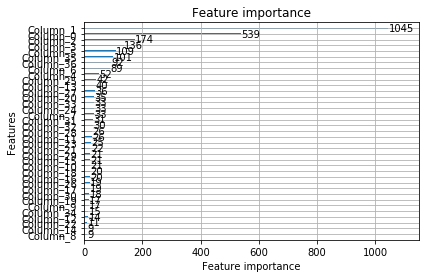

In [227]:
plt.figure(figsize=(20,20))
lgb.plot_importance(model)

In [229]:
lgb_pred = model.predict(testing_data)

In [230]:
lgb_pred_data = pd.DataFrame({'Emp_ID':test_data['Emp_ID'],"Target":lgb_pred})

In [231]:
lgb_pred_data

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0
...,...,...
736,2134,0
737,2255,0
738,448,0
739,1644,0


In [232]:
lgb_pred_data.to_csv('lbg_pred.csv')